In [24]:
import sys
sys.path.append("pathto/HCgit/utils")
import neighbors
import importlib 
importlib.reload(neighbors)
from scipy import stats
import draw
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [ ]:
seq = ["T57","T55", "T53","T49", "T47", "T43", "T41", "T39", "T37", "T33", "T31", 
 "T27", "T25", "T30", "T32", "T34", "T36", "T40", "T42", "T44", "T48", "T50", "T52"]
adatacells = {}

for i in seq:
    adata = sc.read_h5ad("/home/share/ST_macaque/HIP_1015/HIP_macaque/final/cell/macaque1/%s.h5ad"%i)
    adatacells[i] = adata#[adata.obs["need"]]

In [92]:
excitory= ['Glu pSUB-deep-1', 'Glu pSUB-deep-2','Glu pSUB-deep-3', 
            'Glu pSUB-int-1', 'Glu pSUB-int-2', 'Glu pSUB-int-3', 
            'Glu pSUB-int-4','Glu pSUB-int-5','Glu pSUB-int-6', 
            'Glu pSUB-int-7']
inhibitory = ["GABA CCK-1", "GABA LAMP5-1", "GABA LAMP5-2", "GABA PVALB-1", "GABA PVALB-2",
              "GABA SST-1", "GABA SST-2", "GABA VIP-1"]

In [93]:
for i in adatacells:
    adatacells[i].obs["cellType"] = adatacells[i].obs["cellType"].apply(neighbors.filtercells(excitory, inhibitory))
    adatacells[i] = adatacells[i][adatacells[i].obs["cellType"] != "NAN"]
    adatacells[i].obs["type"] = adatacells[i].obs["cellType"].apply(neighbors.getType)
    adata = adatacells[i]
    adata.X[:, adata.var_names.get_loc("GLS")] = np.array(adatacells[i].obs["cellType"].apply(neighbors.markGLu))
    adata.X[:, adata.var_names.get_loc("GAD1")] = np.array(adatacells[i].obs["cellType"].apply(neighbors.markGABA))

/home/feity/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  after removing the cwd from sys.path.
/home/feity/.conda/envs/tf/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [94]:
cellnum = {}
for i in adatacells:
    cellnum[i] = adatacells[i].obs["cellType"].value_counts() 
cellnum = pd.DataFrame(cellnum)
cellnum = cellnum.fillna(0)
cellnum

,T57,T55,T53,T49,T47,T43,T41,T39,T37,T33,...,T30,T32,T34,T36,T40,T42,T44,T48,T50,T52
GABA CCK-1,57.0,143,135,238,138,137,142,131,141,107,...,93,57,83,85,95,90,100,59,46,41.0
GABA LAMP5-1,21.0,44,88,91,60,107,57,85,88,35,...,54,36,37,32,31,41,39,24,21,11.0
GABA LAMP5-2,8.0,14,63,67,84,118,80,87,65,47,...,28,20,20,28,16,26,20,22,7,6.0
GABA PVALB-1,133.0,227,309,572,374,396,429,365,235,321,...,342,225,282,176,164,337,396,259,231,111.0
GABA PVALB-2,28.0,53,96,67,101,104,90,127,116,84,...,70,45,49,47,43,63,77,58,38,56.0
GABA SST-1,92.0,92,141,275,152,237,232,169,133,74,...,60,46,51,63,45,62,67,23,13,24.0
GABA SST-2,46.0,53,104,131,83,105,114,114,103,75,...,104,51,61,69,39,52,69,34,23,33.0
GABA VIP-1,10.0,24,77,48,70,86,51,103,83,84,...,88,40,37,61,24,39,63,26,26,11.0
Glu pSUB-deep-1,384.0,493,786,492,360,644,557,470,508,336,...,232,85,197,174,131,153,217,113,197,105.0
Glu pSUB-deep-2,419.0,416,474,385,274,520,464,453,520,449,...,285,199,227,242,212,288,345,183,155,181.0


In [95]:
neighbor = neighbors.getNeighbors(adatacells)
enrich_score, bases =  neighbors.getNeighborEnrichmentScore(neighbor, excitory)
score = neighbors.normalizeScore(enrich_score, neighbor)

In [ ]:
cellnum = cellnum.sum(axis=1).loc[inhibitory]
cellnum = cellnum/sum(cellnum)

In [98]:
base = bases["GABA"]
base = base.div(base.sum(axis=0), axis=1)
base = base.div(cellnum, axis=0)
base

,Glu pSUB-deep-1,Glu pSUB-deep-2,Glu pSUB-deep-3,Glu pSUB-int-1,Glu pSUB-int-2,Glu pSUB-int-3,Glu pSUB-int-4,Glu pSUB-int-5,Glu pSUB-int-6,Glu pSUB-int-7
GABA CCK-1,0.837260,0.823610,0.697597,0.712877,0.988166,0.995571,1.021338,1.211804,1.195998,0.921206
GABA LAMP5-1,0.779786,0.815064,0.722246,0.786360,1.027786,0.779007,1.008589,0.978990,1.240709,0.936101
GABA LAMP5-2,0.808384,0.725847,0.665565,0.598463,0.547053,0.711014,0.816588,0.480242,0.538247,0.762960
GABA PVALB-1,0.963618,0.942008,0.870076,1.033935,1.029078,1.115972,0.992206,1.127220,1.034897,0.973605
GABA PVALB-2,1.272739,1.845100,2.040818,1.305811,0.882327,1.041671,0.912696,1.151146,0.800635,1.234213
GABA SST-1,0.940081,0.722697,0.464107,0.572136,0.491050,0.783109,0.880657,0.179217,0.339402,0.819333
GABA SST-2,1.684901,1.492628,2.329581,2.011865,1.389120,1.137425,1.267187,1.125073,1.098411,1.444216
GABA VIP-1,0.677463,0.746932,0.597034,0.853204,1.726538,0.926364,1.102474,1.404891,1.884589,0.948201


Glu pSUB-deep-1 Total


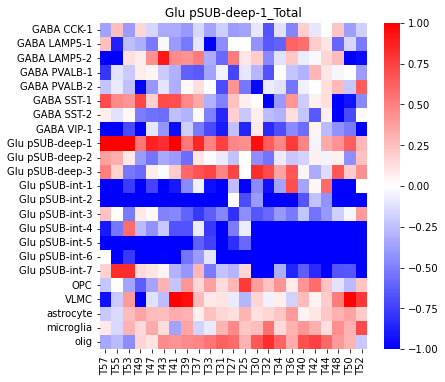

Glu pSUB-deep-2 Total


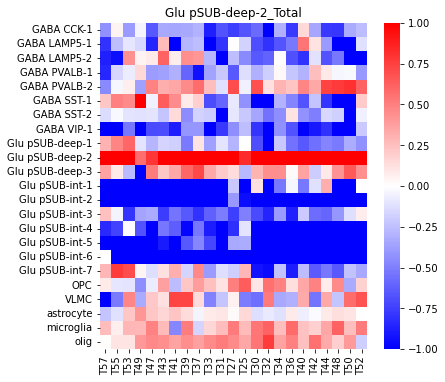

Glu pSUB-deep-3 Total


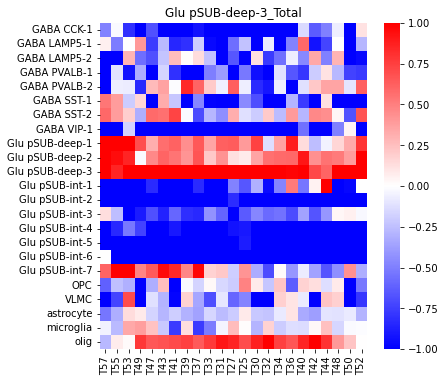

Glu pSUB-int-1 Total


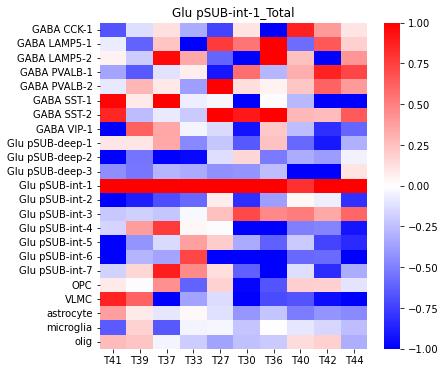

Glu pSUB-int-2 Total


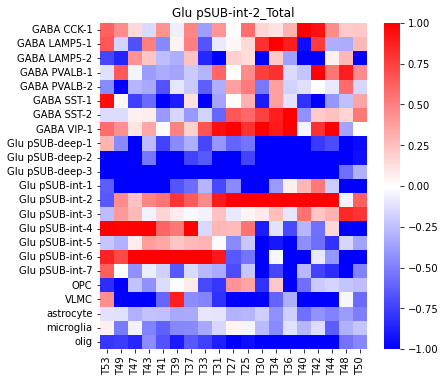

Glu pSUB-int-3 Total


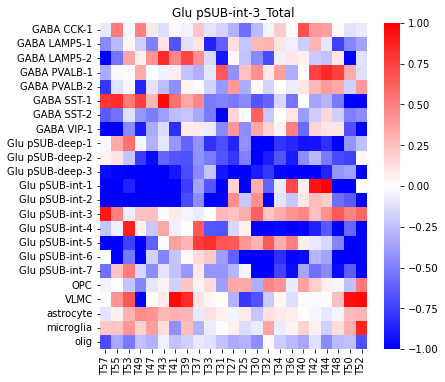

Glu pSUB-int-4 Total


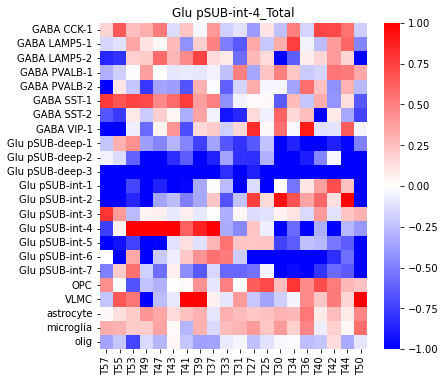

Glu pSUB-int-5 Total


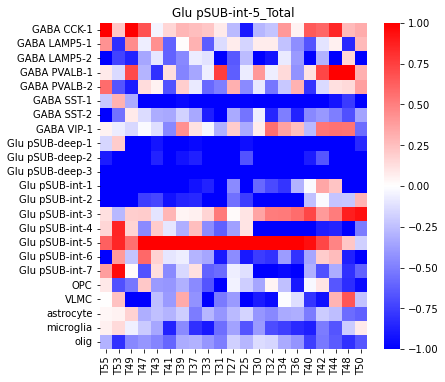

Glu pSUB-int-6 Total


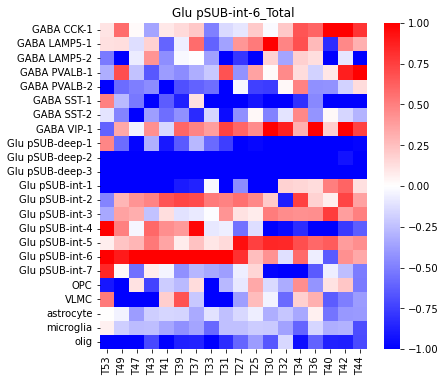

Glu pSUB-int-7 Total


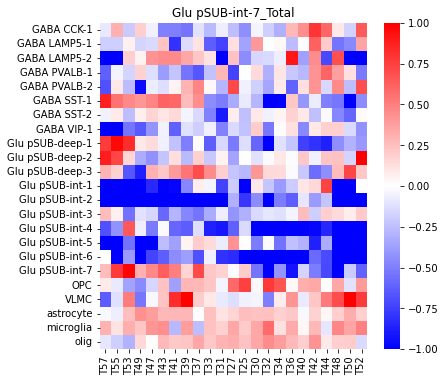

In [14]:
THRES = 30 # -1
for j in ["Total"]:
    for celltype in excitory:
        require = {}
        for i in seq:
            if cellnum[i][celltype] < THRES:#min(THRES, np.mean(cellnum.loc[celltype])):
                continue
            s = score[i][j]
            require[i] = s[celltype]
        
        require = pd.DataFrame(require)
        plt.figure(figsize=(6,6))
        sns.heatmap(require, vmax=1, vmin=-1, cmap="bwr")
        plt.title("%s_%s"%(celltype, j))
        print(celltype, j)
        plt.savefig("")
        plt.show()
        plt.close()

In [99]:
macaque_adata = sc.read_h5ad("pathto/singlecell/macaque.h5ad")
sc.pp.normalize_total(macaque_adata, target_sum=1e6)
sc.pp.log1p(macaque_adata)

In [100]:
macaque_adata.obs["cellType"] = macaque_adata.obs["cellType"].apply(neighbors.filtercells(excitory, inhibitory))
macaque_adata = macaque_adata[macaque_adata.obs["cellType"] != "NAN"]
df_macaque = pd.DataFrame(macaque_adata.X.toarray(), columns= macaque_adata.var_names)
df_macaque["cell"] = list(macaque_adata.obs["cellType"])
df_macaque = df_macaque.groupby("cell").mean()
# df_macaque

In [101]:
need_pairs = [
    ("GABA CCK-1", "Glu pSUB-int-2"), 
    ("GABA LAMP5-1", "Glu pSUB-int-2"), 
    ("GABA LAMP5-2", "Glu pSUB-int-2"), 
    ("GABA PVALB-1", "Glu pSUB-int-2"), 
    ("GABA PVALB-2", "Glu pSUB-int-2"), 
    ("GABA SST-1", "Glu pSUB-int-2"), 
    ("GABA SST-2", "Glu pSUB-int-2"), 
    ("GABA VIP-1", "Glu pSUB-int-2"), 
]
consider_pairs = [
 ('GAD1', 'GABRA1'),
 ('GAD1', 'GABRA2'),
 ('GAD1', 'GABRB1'),
 ('GAD1', 'GABRB2'),
 ('GAD1', 'GABRB3'),
 ("GRIA1", "GLS"), 
 ("GRIA2", "GLS"), 
 ("GRIN2A", "GLS"), 
 ("GRIN2B", "GLS"), 
 ("GRID2", "GLS"), 
 ("GRIK1", "GLS"), 
 ("GRIK2", "GLS"), 
]
ylabel = [f"%s→%s"%(s[0], s[1]) for s in consider_pairs]
xlabel = [s[0] for s in need_pairs]

In [102]:
res = np.zeros((len(ylabel), len(xlabel)))
source = [] 
target = [] 
weight = []
x = [] 
y = [] 
pvals = []

for i in range(len(ylabel)):
    for j in range(len(xlabel)):
        res[i][j] = df_macaque[consider_pairs[i][0]][need_pairs[j][0]]*df_macaque[consider_pairs[i][1]][need_pairs[j][1]]

res = np.log(res+0.01)
res = stats.zscore(res, axis=0, ddof=1)

for i in range(len(ylabel)):
    for j in range(len(xlabel)):
        source.append(need_pairs[j][0])
        target.append(consider_pairs[i][1])
        
        pvals.append(1)
        x.append(j)
        y.append(i)
        
        weight.append(res[i][j])

In [104]:
df = pd.DataFrame({"source":source, "target":target, "weight":weight, "x":x, "y":y})
df["interact"] = df["source"].map(np.log(base["Glu pSUB-int-2"]))
df["interact"] = df["interact"].apply(lambda x: np.abs(x)/x*0.8 if np.abs(x) > 0.8 else x)
df["weight"] = df["weight"].apply(lambda x: np.abs(x)/x*1.5 if np.abs(x) > 1.5 else x)
df.head(10)

,source,target,weight,x,y,pval,interact
0,GABA CCK-1,GABRA1,-0.809517,0,0,1,-0.011905
1,GABA LAMP5-1,GABRA1,-1.417375,1,0,1,0.027407
2,GABA LAMP5-2,GABRA1,-1.477155,2,0,1,-0.603210
3,GABA PVALB-1,GABRA1,-0.280097,3,0,1,0.028663
4,GABA PVALB-2,GABRA1,-0.167744,4,0,1,-0.125192
5,GABA SST-1,GABRA1,-1.015553,5,0,1,-0.711208
6,GABA SST-2,GABRA1,-1.447549,6,0,1,0.328671
7,GABA VIP-1,GABRA1,-1.290178,7,0,1,0.546118
8,GABA CCK-1,GABRA2,-0.039024,0,1,1,-0.011905
9,GABA LAMP5-1,GABRA2,-0.073516,1,1,1,0.027407


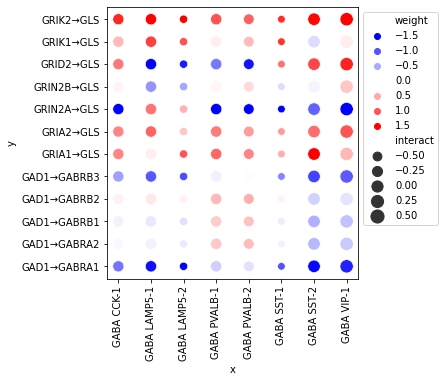

In [106]:
cmap = draw.getColorMap() 
fig = plt.figure(figsize=(4.5, 5))
ax = fig.gca()
# draw.plot_color_gradients("test", [cmap])
ax = sns.scatterplot(data = df, x = 'x', y = 'y',
                    hue = 'weight', hue_norm=(-1.5, 1.5),
                    palette = "bwr", size="interact", sizes=(50,200), size_norm=(-0.8, 0.8), ax=ax)
plt.xticks(range(len(xlabel)), xlabel, rotation=90)
plt.yticks(range(len(ylabel)), ylabel)
plt.legend(bbox_to_anchor=(1, 1))